In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Import Data

In [2]:
company_data =pd.read_csv('C:\\Users\\user\\Downloads\\Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Understanding

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
del company_data['US']

In [7]:
company_data.shape

(400, 10)

In [8]:
del company_data['Urban']

In [9]:
company_data.shape

(400, 9)

In [10]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,Bad,42,17
1,11.22,111,48,16,260,83,Good,65,10
2,10.06,113,35,10,269,80,Medium,59,12
3,7.40,117,100,4,466,97,Medium,55,14
4,4.15,141,64,3,340,128,Bad,38,13


In [11]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
dtype: object

# Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [13]:
company_data['ShelveLoc']=le_encoder.fit_transform(company_data['ShelveLoc'])
company_data['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [14]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
dtype: object

In [15]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,0,42,17
1,11.22,111,48,16,260,83,1,65,10
2,10.06,113,35,10,269,80,2,59,12
3,7.40,117,100,4,466,97,2,55,14
4,4.15,141,64,3,340,128,0,38,13


# Model Building

In [16]:
X= company_data.drop(['ShelveLoc'],axis=1)
y= company_data[['ShelveLoc']]

In [17]:
X.shape,y.shape

((400, 8), (400, 1))

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=123)  # Splitting data into training and testing data set

In [19]:
X_train.shape,y_train.shape

((340, 8), (340, 1))

In [20]:
X_test.shape,y_test.shape

((60, 8), (60, 1))

In [29]:
import seaborn as sns

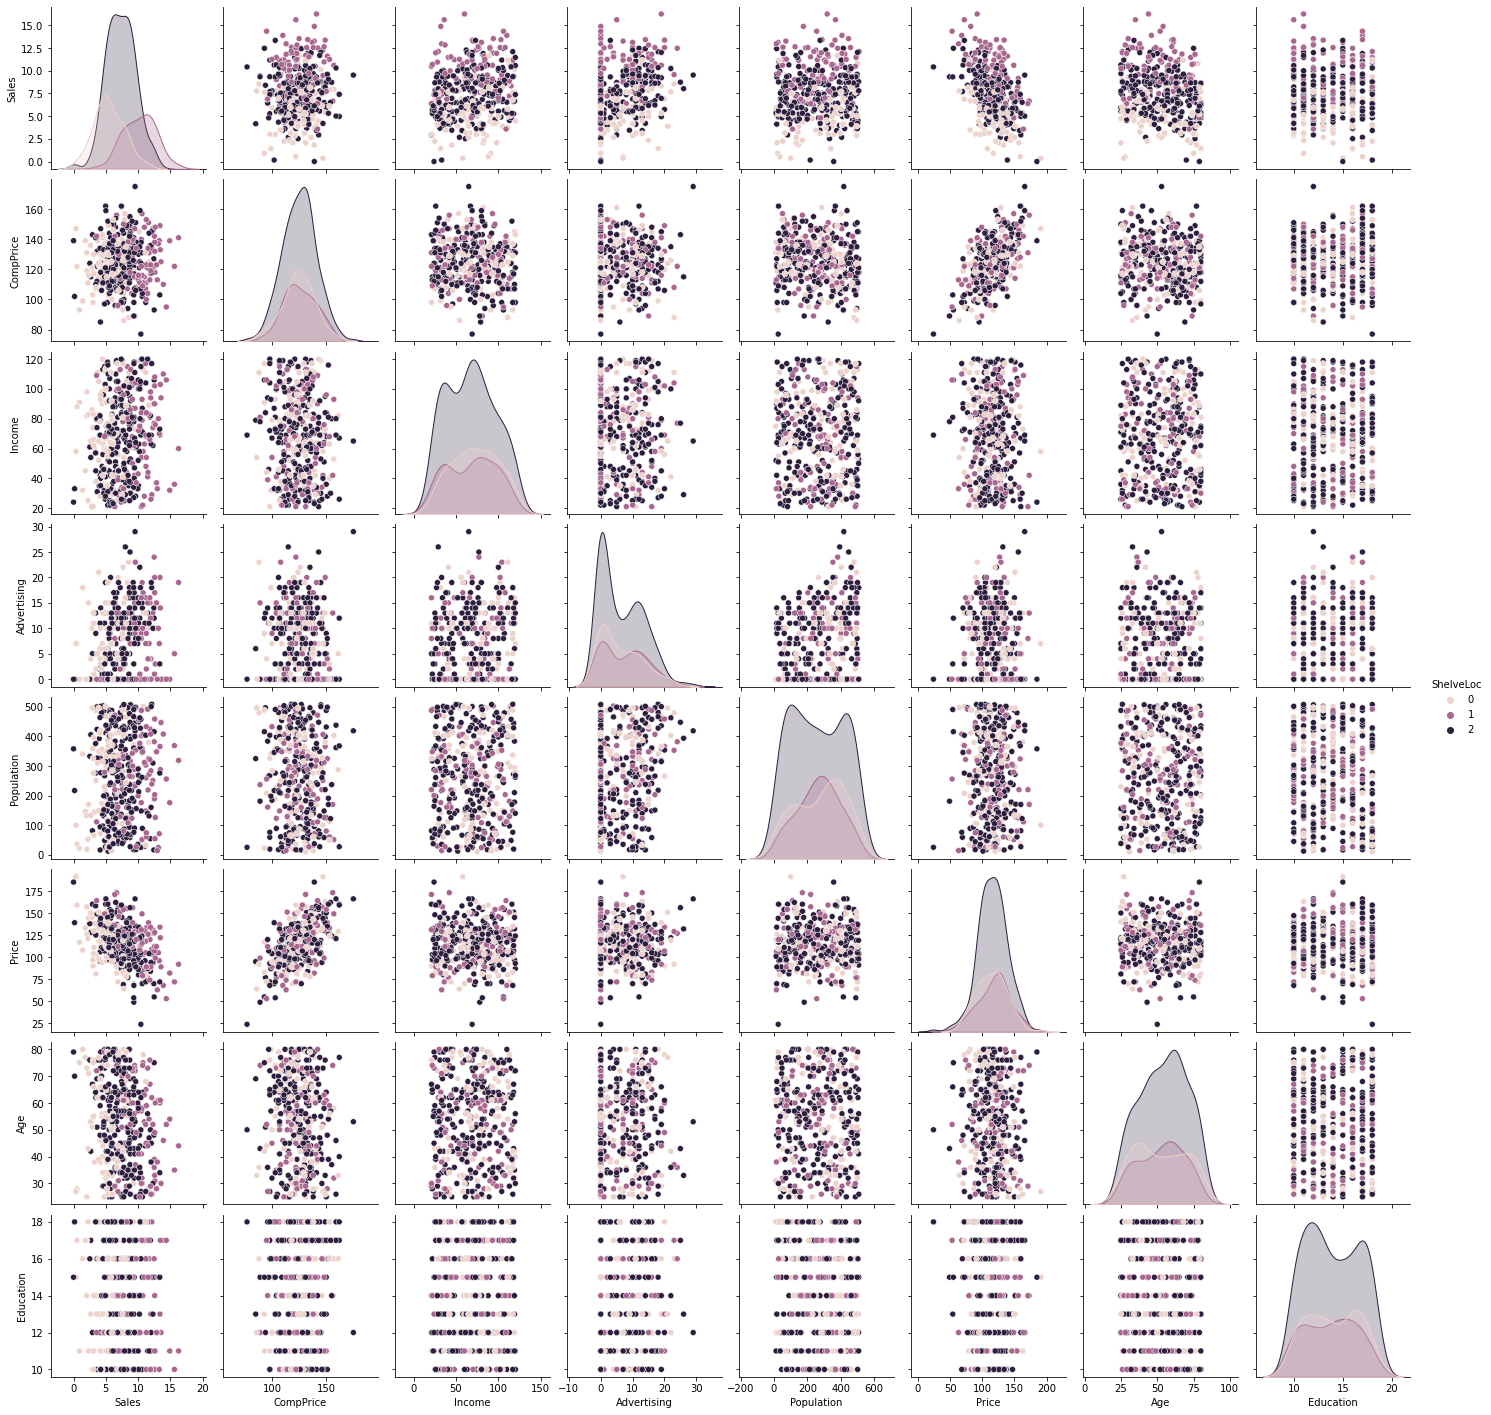

In [30]:
sns.pairplot(data=company_data,hue='ShelveLoc')

In [31]:
company_data['ShelveLoc'].unique()

array([0, 1, 2])

In [34]:
company_data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

# Model Training

# Building decision tree by using Entropy

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Plot the Tree

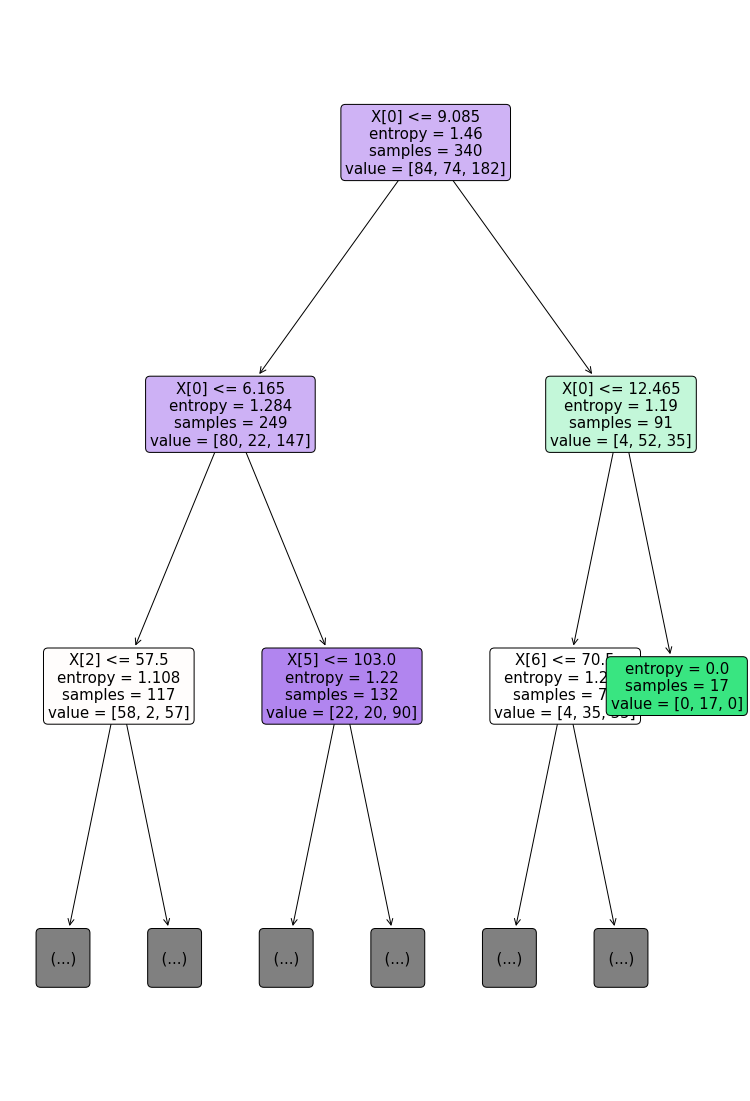

In [37]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,20))
plot_tree(decision_tree = dt_model,filled=True,rounded=True,fontsize=15, max_depth=2)
plt.show()

# Model Testing|| Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
#Train data

In [42]:
y_predict_train=dt_model.predict(X_train)

pd.Series(y_predict_train).value_counts()

2    245
0     68
1     27
dtype: int64

In [43]:
accuracy_score(y_train,y_predict_train)

0.6647058823529411

In [44]:
y_predict_train

array([2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,

In [49]:
confusion_matrix(y_train,y_predict_train)

array([[ 42,   1,  41],
       [  2,  26,  46],
       [ 24,   0, 158]], dtype=int64)

In [ ]:
# Test data

In [50]:
y_test_predict=dt_model.predict(X_test)

In [51]:
accuracy_score(y_test,y_test_predict)

0.5666666666666667

In [52]:
confusion_matrix(y_test,y_test_predict)

array([[ 4,  0,  8],
       [ 0,  1, 10],
       [ 6,  2, 29]], dtype=int64)

# Building Decision Tree by Using Gini Criteria

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_model2=DecisionTreeClassifier( criterion='gini',max_depth=3)
dt_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

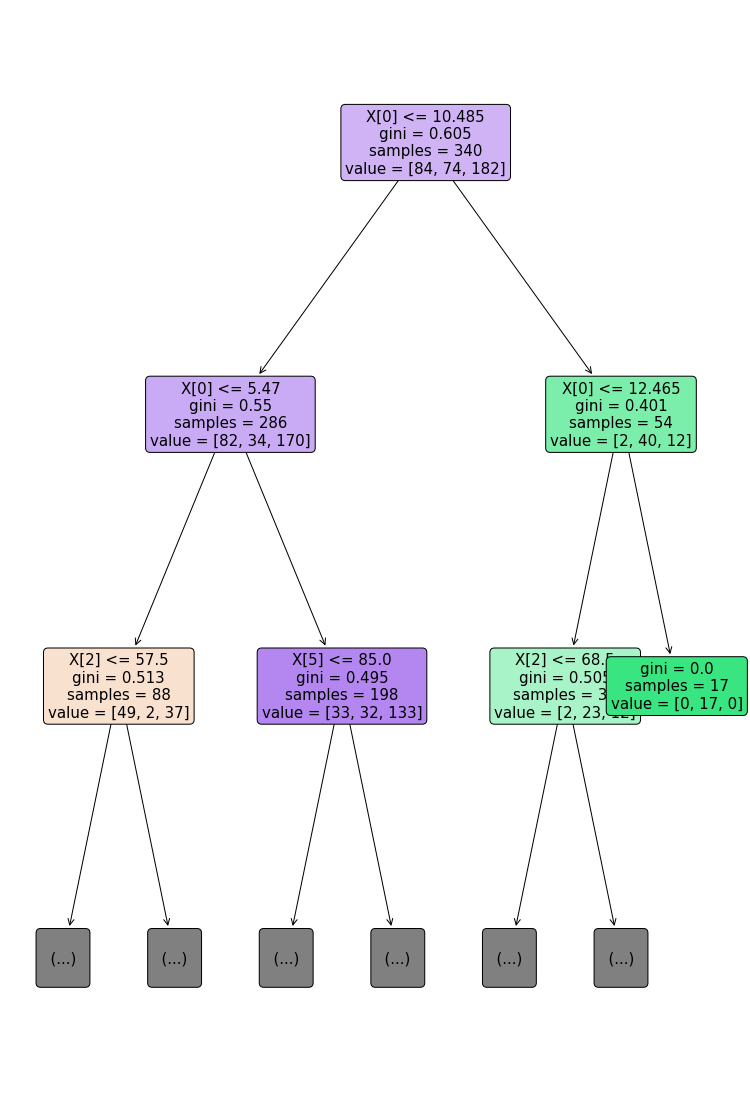

In [58]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,20))
plot_tree(decision_tree = dt_model2,filled=True,rounded=True,fontsize=15, max_depth=2)
plt.show()

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Train Data

In [61]:
y_train_pred=dt_model2.predict(X_train) #Predicting on train data

In [62]:
accuracy_score(y_train,y_train_pred) # prediction 

0.6941176470588235

In [63]:
confusion_matrix(y_train,y_train_pred)

array([[ 44,   0,  40],
       [  2,  31,  41],
       [ 20,   1, 161]], dtype=int64)

In [ ]:
# Test train

In [65]:
y_pred_test=dt_model2.predict(X_test) #Predicting on test data

In [67]:
accuracy_score(y_test,y_pred_test) # computing the accuracy

0.55

In [68]:
confusion_matrix(y_test,y_pred_test)

array([[ 4,  0,  8],
       [ 0,  2,  9],
       [ 7,  3, 27]], dtype=int64)